<a href="https://www.kaggle.com/code/chikeeze/coffee-sales-data-analysis-project?scriptVersionId=294843947" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-sales-dataset/Coffe_sales.csv


# Coffee Sales Data Analysis   
  

## 1. **Introduction**  
***In this notebook, we will analyze the coffee sales dataset using Python, SQL, pandas, numpy, matplotlib and seaborn to understand sales patterns, customer preferences, and seasonal trends.*** 

## 2. **Importing Libraries**

In [2]:
# single cell — DuckDB (For running SQL commands)
!pip install --quiet duckdb
import duckdb

import os
import sys
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Check the version of the various libraries
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)

# List all folders in the input directory
print(os.listdir("/kaggle/input"))
print(os.listdir("/kaggle/input/coffee-sales-dataset"))



Matplotlib version: 3.7.2
Seaborn version: 0.12.2
Pandas version: 2.2.3
Numpy version: 1.26.4
['coffee-sales-dataset']
['Coffe_sales.csv']


## 3. **Loading the Dataset and data overview**


In [3]:
#Load and explore the data
file_path = "/kaggle/input/coffee-sales-dataset/Coffe_sales.csv"
df = pd.read_csv(file_path)

# To get the first five rows of the table
print("This is the first five rows of the table")
print(df.head())
print()

# To get the shape of the table
print("The shape of the table is: ", df.shape)
print()

# Get the columns names
print("The columns headers in the table are: ", df.columns)
print()


This is the first five rows of the table
   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort        Date             Time  
0            5          3  2024-03-01  10:15:50.520000  
1            5          3  2024-03-01  12:19:22.539000  
2            5          3  2024-03-01  12:20:18.089000  
3            5          3  2024-03-01  13:46:33.006000  
4            5          3  2024-03-01  13:48:14.626000  

The shape of the table is:  (3547, 11)

The columns headers in the table are:  Index(['hour_of_day', 'cash_type', 'money', 'coffe

* used df = pd.read_csv() to import the csv file
* used df.head() to get the first five rows of the database
* used df.shape to get the shape of the table
* used df.column to get the columns header of the table

## 4. **Cleaning and Understanding the data**

## 4.1 Data types

In [4]:
# To get an overview of the table
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB
None


## 4.2 Summary statistics

In [5]:
print(df.describe())

       hour_of_day        money  Weekdaysort    Monthsort
count  3547.000000  3547.000000  3547.000000  3547.000000
mean     14.185791    31.645216     3.845785     6.453905
std       4.234010     4.877754     1.971501     3.500754
min       6.000000    18.120000     1.000000     1.000000
25%      10.000000    27.920000     2.000000     3.000000
50%      14.000000    32.820000     4.000000     7.000000
75%      18.000000    35.760000     6.000000    10.000000
max      22.000000    38.700000     7.000000    12.000000



* uded df.info() to get some information in the database
* used df.describe() to to give me some statistical information for some columns in the table

**My Analysis based on the current data**
* Mean price for all coffee = 31.65
* Median price for all coffee = 32.82
* Minimum coffee price = 18.12
* Maximum coffee price = 38.70

**All Sales occur between 6am and 10pm**

## 4.3 Checking for null values or duplicated rows

In [6]:
#cleaning the data
print(df.isnull().sum())
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64
0


* Used df.isnull().sum() to check for any null values in each column of the database
* Used df.duplicated().sum() to check the number of duplicated rows in the database
* used df.drop_duplicates(inplace = True) to remove duplicates rows in the database
  
**My Analysis**
* Zero null values in each columns
* Zero duplicates

## 5. **Exploring the Data**


## 5.1 Total Sales revenue and order with start and end date of sales

In [7]:
#What is the total revenue and number of orders overall?
print('Total revenue over the period: ',df['money'].sum())
print('Total number of orders: ', df['money'].count())

Total revenue over the period:  112245.58
Total number of orders:  3547


In [8]:
# Using SQL with DuckDB
q6 = """
SELECT MIN(Date), MAX(Date) FROM df
"""
duckdb.query(q6).to_df()

,min(Date),max(Date)
0,2024-03-01,2025-03-23


In [9]:
# Using Python pandas
print(df["Date"].min())
print(df["Date"].max())

2024-03-01
2025-03-23



**My analysis**
1. Total revenue = **112245.58 dollars**
2. Total number of orders = **3547**
3. **The start date in the data is: 2024-03-01**
4. **The end date in the data is: 2025-03-23**

## 5.2 Sales Revenue in January

In [10]:
#Total sales in the month of January
df1 = df[df['Month_name'] == 'Jan']
sales_jan = df1['money'].sum()
print('Total sales in the month of Jan :', sales_jan)

Total sales in the month of Jan : 6398.859999999999


**My Analysis.**
* Total sales in the month of **January** = **6398.86 dollars**

## 5.3 Sales revenue by coffee name

In [11]:
#Which coffee type generates the most sales revenue?
cts = df.groupby('coffee_name')['money'].sum()
print(cts)

pivot = df.pivot_table(index = ['coffee_name'], values = ['money'], aggfunc = 'sum')
print(pivot)


coffee_name
Americano              14650.26
Americano with Milk    24751.12
Cappuccino             17439.14
Cocoa                   8521.16
Cortado                 7384.86
Espresso                2690.28
Hot Chocolate           9933.46
Latte                  26875.30
Name: money, dtype: float64
                        money
coffee_name                  
Americano            14650.26
Americano with Milk  24751.12
Cappuccino           17439.14
Cocoa                 8521.16
Cortado               7384.86
Espresso              2690.28
Hot Chocolate         9933.46
Latte                26875.30


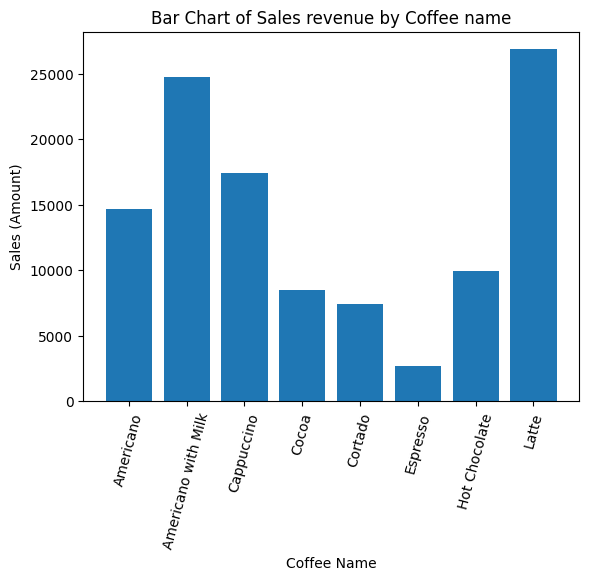

<Figure size 700x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [12]:
# Visualization with Matplotlib
coffee = np.array(['Americano', 'Americano with Milk', 'Cappuccino', 'Cocoa', 'Cortado', 'Espresso', 'Hot Chocolate', 'Latte'])
sales = np.array([14650.26, 24751.12, 17439.14, 8521.16, 7384.86, 2690.28, 9933.46, 26875.30])
plt.bar(coffee, sales)
plt.title('Bar Chart of Sales revenue by Coffee name')
plt.xlabel('Coffee Name')
plt.ylabel('Sales (Amount)')
plt.xticks(rotation=75)
plt.figure(figsize=(7,8))

plt.show()
plt.savefig('coffee_bar.jpg')

           coffee_name  Total Amount
0                Latte      26875.30
1  Americano with Milk      24751.12
2           Cappuccino      17439.14
3            Americano      14650.26
4        Hot Chocolate       9933.46
5                Cocoa       8521.16
6              Cortado       7384.86
7             Espresso       2690.28


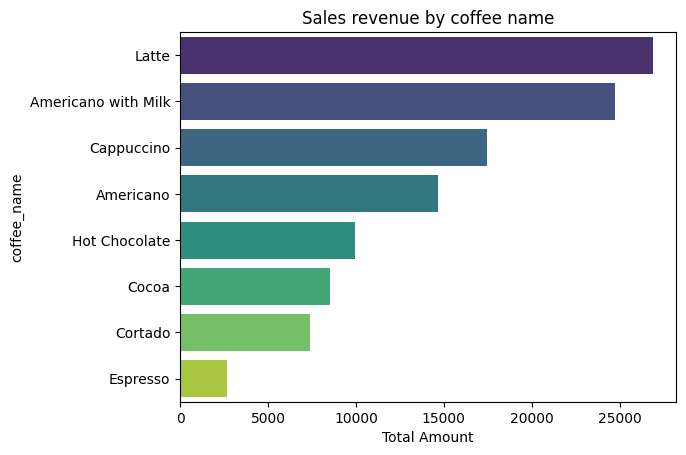

In [13]:
# Using SQL command and visualizing with Seaborn
q = """
SELECT coffee_name, SUM(money) AS "Total Amount" FROM df
GROUP BY coffee_name
ORDER BY "Total Amount" DESC
"""
s = duckdb.query(q).to_df()
print(s)
sns.barplot(x="Total Amount", y="coffee_name", data=s, palette="viridis")
plt.title("Sales revenue by coffee name")

plt.show()

**My Analysis**
* **Latte coffee** generated the most sales revenue over the given period
* Total revenue from **Latte coffee = 26875.30 dollars**
* **Americano with milk** coffee generated the second highest sales revenue over the given period
* Total revenue from **Americano with milk coffee = 24751.12 dollars**
* **Espresso coffee** generated the least sales revenue over the given period
* Total revenue from **Espresso coffee = 2690.28 dollars**

## 5.4 Monthly Sales

In [14]:
#Monthly sales
pivot1 = df.pivot_table(index = ['Month_name'], values = ['money'], aggfunc = 'sum')
print(pivot1)


               money
Month_name          
Apr          5719.56
Aug          7613.84
Dec          8237.74
Feb         13215.48
Jan          6398.86
Jul          6915.94
Jun          7617.76
Mar         15891.64
May          8164.42
Nov          8590.54
Oct         13891.16
Sep          9988.64


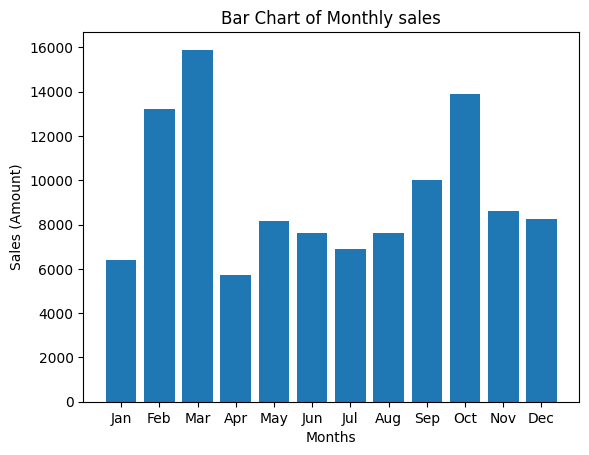

<Figure size 640x480 with 0 Axes>

In [15]:
# Visualization with Matplotlib
x = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
y = np.array([6398.86, 13215.48, 15891.64, 5719.56, 8164.42, 7617.76, 6915.94, 7613.84, 9988.64, 13891.16, 8590.54, 8237.74])
plt.bar(x, y)
#plt.figure(figsize=(6,4))
plt.title("Bar Chart of Monthly sales")
plt.xlabel("Months")
plt.ylabel("Sales (Amount)")

plt.show()
plt.savefig('month_bar.jpg')

   month   revenue
2    Mar  15891.64
9    Oct  13891.16
1    Feb  13215.48
8    Sep   9988.64
10   Nov   8590.54
11   Dec   8237.74
4    May   8164.42
5    Jun   7617.76
7    Aug   7613.84
6    Jul   6915.94
0    Jan   6398.86
3    Apr   5719.56


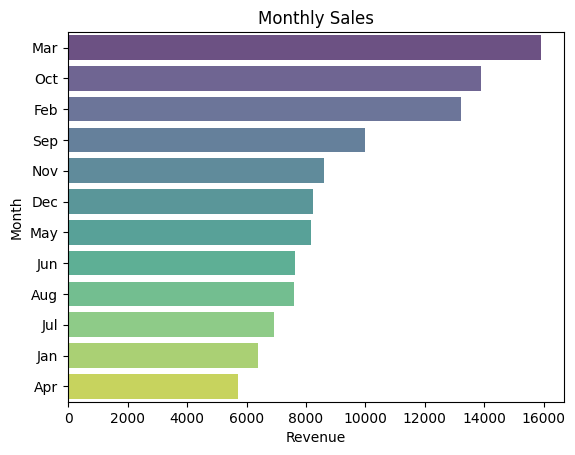

In [16]:
# Visualization with Seaborn
d = {
    "month": ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    "revenue": [6398.86, 13215.48, 15891.64, 5719.56, 8164.42, 7617.76, 6915.94, 7613.84, 9988.64, 13891.16, 8590.54, 8237.74]
}
df1 = pd.DataFrame(d)

df2 = df1.sort_values(by="revenue", ascending=False)
print(df2)
sns.barplot(x="revenue", y="month", data=df2, palette="viridis", alpha=.8)
plt.title("Monthly Sales")
plt.xlabel("Revenue")
plt.ylabel("Month")

plt.show()

**My Analysis**
* The month of **March** has the most sales revenue
* Total revenue in the month of **March** = **15891.64 dollars**
* The month of **October** has the second highest sales revenue
* Total revenue in the month of **October** = **13891.16 dollars**
* The month of **April** has the least sales revenue
* Total revenue in the month of **April** = **5719.56 dollars**

## 5.5 Coffee Sales revenue by day of the week

Weekday
Fri    16802.66
Mon    17363.10
Sat    14733.52
Sun    13336.06
Thu    16091.40
Tue    18168.38
Wed    15750.46
Name: money, dtype: float64
Axes(0.125,0.11;0.775x0.77)


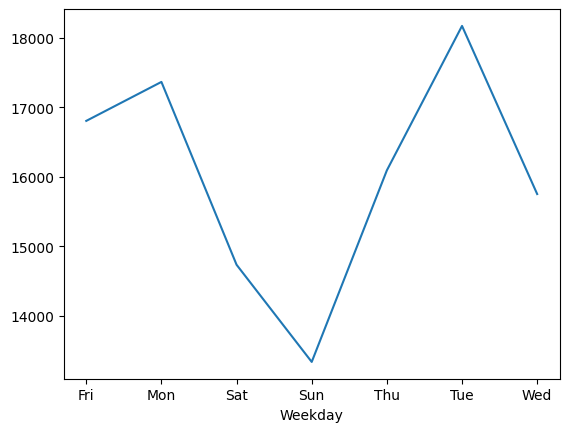

In [17]:
#Which day of the week has the highest sales?
dfgbd = df.groupby('Weekday')['money'].sum()
print(dfgbd)

print(dfgbd.plot())

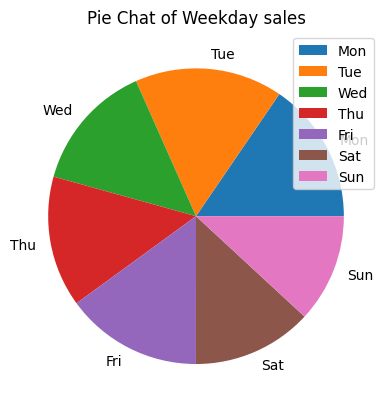

<Figure size 640x480 with 0 Axes>

In [18]:
# Visualization with Matplotlib 
# Pie chart
x = np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
y = np.array([17363.10, 18168.38, 15750.46, 16091.40, 16802.66, 14733.52, 13336.06])
plt.pie(y, labels = x)
plt.title('Pie Chat of Weekday sales')
plt.legend(loc = 'upper right')

plt.show()
plt.savefig('week_pie.jpg')

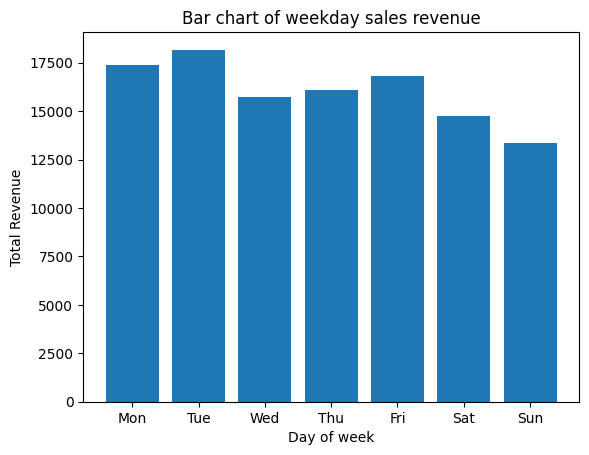

In [19]:
# Bar chart
x = np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
y = np.array([17363.10, 18168.38, 15750.46, 16091.40, 16802.66, 14733.52, 13336.06])

plt.bar(x, y)
plt.title("Bar chart of weekday sales revenue")
plt.xlabel("Day of week")
plt.ylabel("Total Revenue")

plt.show()

**My Analysis**
* The day of the week with the highest sales revenue is   **Tuesday**
* Total sales revenue on **Tuesday** = **18168.38 dollars**
* The day of the week with the least sales revenue is **Sunday**
* Total sales revenue on **Sunday** = **13336.06 dollars**

**From the bar chart we see that weekdays tends to be more profitable than weekends**

## 5.6 Sales revenue by Time of the Day

Time_of_Day
Afternoon    38130.04
Morning      35929.20
Night        38186.34
Name: money, dtype: float64
Axes(0.125,0.11;0.775x0.77)


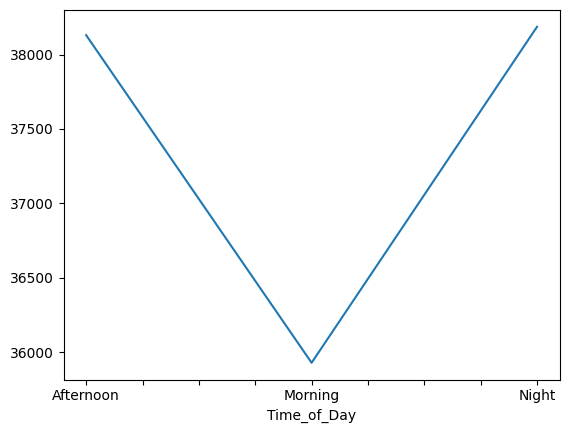

In [20]:
# Using Python pandas
dftod = df.groupby('Time_of_Day')['money'].sum()
print(dftod)

print(dftod.plot())

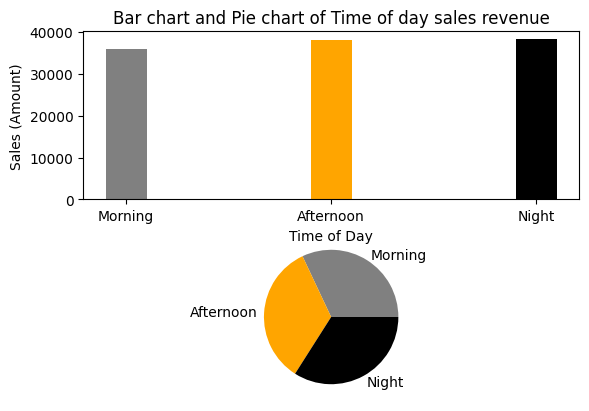

In [21]:
# Visualization with Matplotlib
tod = np.array(['Morning', 'Afternoon', 'Night'])
amount = np.array([35929.20, 38130.04, 38186.34 ])
colors = np.array(["gray", "orange", "black"])

#plot 1
plt.subplot(2, 1, 1)
plt.bar(tod, amount, width=0.2, color=colors)
plt.title('Bar chart and Pie chart of Time of day sales revenue')
plt.ylabel('Sales (Amount)')
plt.xlabel('Time of Day')

#plot 2
plt.subplot(2, 1, 2)
plt.pie(amount, labels = tod, colors=colors)

plt.show()

**My Analysis**
* **Night** has the most sales revenue (Total) = **38,186.64**
* **Afternoon** sales revenue (Total) = **38,130.04**
* **Morning** has the least sales revenue (Total) = **35,929.20**

## 5.7 Coffee types by Quantity sold

Axes(0.125,0.11;0.775x0.77)
                     money
coffee_name               
Americano              564
Americano with Milk    809
Cappuccino             486
Cocoa                  239
Cortado                287
Espresso               129
Hot Chocolate          276
Latte                  757


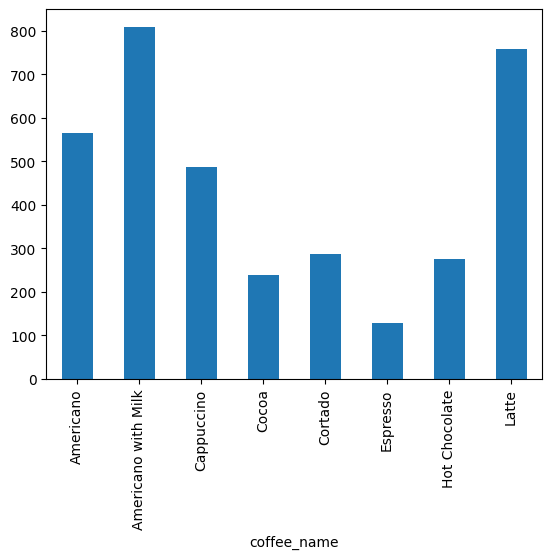

In [22]:
# Using Python Pandas
df1 = df.groupby("coffee_name")["money"].count()
print(df1.plot(kind="bar"))

piv = df.pivot_table(index=["coffee_name"], values=["money"], aggfunc="count")
print(piv)

In [23]:
# Using SQL DuckDB and visualization with seaborn
q4 = """
SELECT coffee_name, COUNT(*) AS quantity_sold FROM df
GROUP BY coffee_name
ORDER BY quantity_sold DESC
"""
s4 = duckdb.query(q4).to_df()
print(s4)

           coffee_name  quantity_sold
0  Americano with Milk            809
1                Latte            757
2            Americano            564
3           Cappuccino            486
4              Cortado            287
5        Hot Chocolate            276
6                Cocoa            239
7             Espresso            129


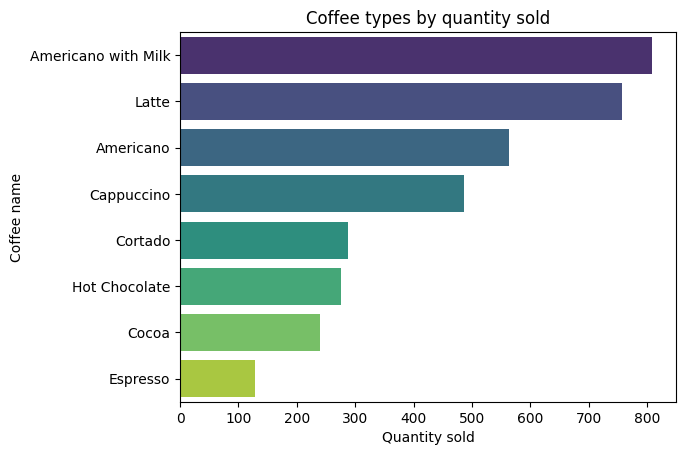

In [24]:
sns.barplot(x="quantity_sold", y="coffee_name", data=s4, palette="viridis")
plt.title("Coffee types by quantity sold")
plt.xlabel("Quantity sold")
plt.ylabel("Coffee name")
plt.show()

**My analysis**

* **The coffee with the  highest quantity sold is Americano with Milk (809)**
* **The coffee with the second highest quantity sold is Latte (757)**
* **The coffee with the lowest quantity sold is Espresso (129)**

## 5.8 **Coffee types that are most popular in each Time of Day**

#### 5.8(a) **Coffee type most popular in the morning**

In [25]:
# Using SQL to get the coffee name and the quantity sold in the morning
q1 = """
SELECT coffee_name, COUNT(*) AS Quantity_sold FROM (SELECT * FROM df
WHERE Time_of_Day = 'Morning')
GROUP BY coffee_name
ORDER BY Quantity_sold DESC
"""
s1 = duckdb.query(q1).to_df()
print(s1)

           coffee_name  Quantity_sold
0  Americano with Milk            331
1            Americano            219
2                Latte            215
3              Cortado            143
4           Cappuccino            122
5                Cocoa             58
6        Hot Chocolate             49
7             Espresso             44


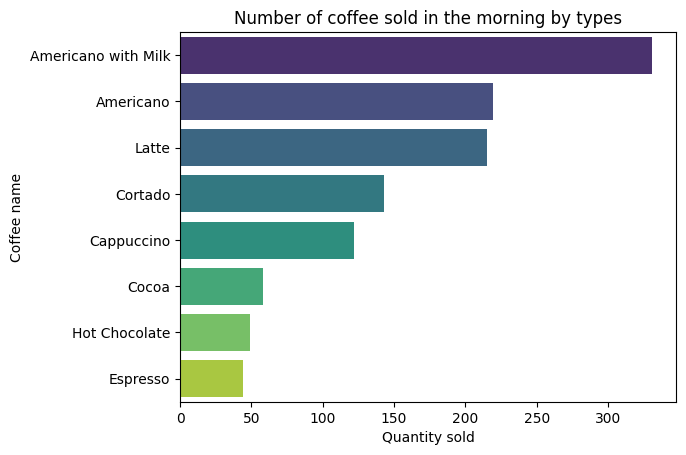

In [26]:
# Visualization with seaborn
sns.barplot(y='coffee_name', x='Quantity_sold', data=s1, palette='viridis')
plt.title('Number of coffee sold in the morning by types')
plt.xlabel("Quantity sold")
plt.ylabel("Coffee name")

plt.show()

**My Analysis**

* **The coffee type that is most popular in the morning is Americano With Milk**
* **The coffee type that is least polular in the morning is Espresso**

#### 5.8(b) **Coffee type most popular in the afternoon**

In [27]:
# Using SQL to get the coffee name and the quantity sold in the afternoon
q2 = """
SELECT coffee_name, COUNT(*) AS Quantity_sold FROM (SELECT * FROM df
WHERE Time_of_Day = 'Afternoon')
GROUP BY coffee_name
ORDER BY Quantity_sold DESC
"""
s2 = duckdb.query(q2).to_df()
print(s2)

           coffee_name  Quantity_sold
0                Latte            270
1  Americano with Milk            239
2            Americano            233
3           Cappuccino            164
4              Cortado             88
5        Hot Chocolate             80
6                Cocoa             75
7             Espresso             56


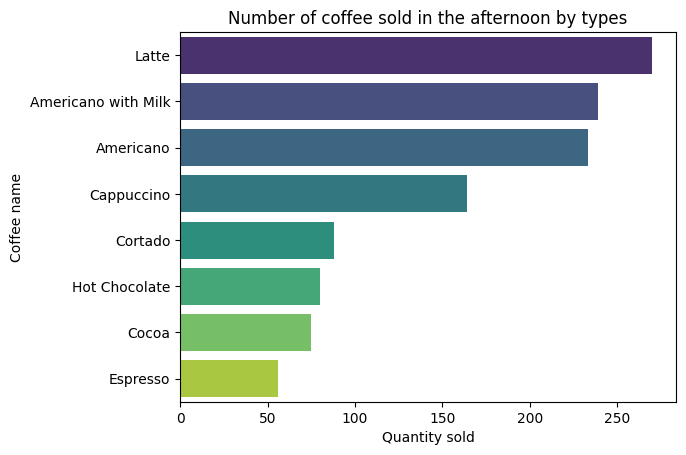

In [28]:
# Visualization with Seaborn
sns.barplot(x='Quantity_sold', y='coffee_name', data=s2, palette='viridis')
plt.title("Number of coffee sold in the afternoon by types")
plt.xlabel("Quantity sold")
plt.ylabel("Coffee name")

plt.show()

**My analysis**

* **The coffee type most popular in the afternoon is Latte**
* **The coffee type least popular in the afternoon is Espresso**

#### 5.8(c) **Coffee type most popular in the night**

In [29]:
# Using SQL to get the coffee name and the quantity sold at night
q3 = """
SELECT coffee_name, COUNT(*) AS Quantity_sold FROM (SELECT * FROM df 
WHERE Time_of_Day = 'Night')
GROUP BY coffee_name
ORDER BY Quantity_sold DESC
"""

s3 = duckdb.query(q3).to_df()
print(s3)

           coffee_name  Quantity_sold
0                Latte            272
1  Americano with Milk            239
2           Cappuccino            200
3        Hot Chocolate            147
4            Americano            112
5                Cocoa            106
6              Cortado             56
7             Espresso             29


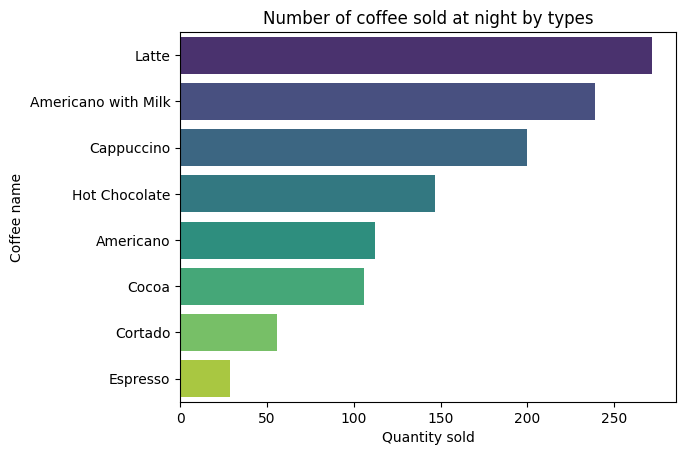

In [30]:
sns.barplot(x='Quantity_sold', y='coffee_name', data=s3, palette='viridis')
plt.title("Number of coffee sold at night by types")
plt.xlabel("Quantity sold")
plt.ylabel("Coffee name")

plt.show()

**My analysis**

* **The coffee type most popular at night is Latte**
* **The coffee type least popular at night is Espresso**

## 5.9 Cash type used for payment

In [31]:
df_cash = df.groupby("cash_type")["money"].count()
print(df_cash)

cash_type
card    3547
Name: money, dtype: int64


**My analysis**

**All the cash type that was used for payment is card**

## 5.10 The day with the highest and least sales revenue

In [32]:
# Using python pandas
day = df.groupby("Date").agg(Revenue=("money", "sum")).reset_index()

t = day[day["Revenue"] == day["Revenue"].max()]
u = day[day["Revenue"] == day["Revenue"].min()]

print(t)
print()
print(u)

           Date  Revenue
221  2024-10-11   836.66

           Date  Revenue
178  2024-08-29    23.02


In [33]:
# Using SQL
q5 = """
(SELECT date, SUM(money) AS revenue FROM df
GROUP BY date
ORDER BY revenue DESC
LIMIT 1)
UNION
(SELECT date, SUM(money) AS revenue FROM df
GROUP BY date
ORDER BY revenue ASC
LIMIT 1)
"""
duckdb.query(q5).to_df()

,Date,revenue
0,2024-08-29,23.02
1,2024-10-11,836.66


**My analysis**

* **The day with the higest sales revenue is on 2024-10-11 with a revenue of about 836.66 dollars**
* **The day with the least sales revenue is on 2024-08-29 with a revenue of 23.02 dollars**

## 5.11 Sales revenue on Christmas and Newyear day

In [34]:
# Using python pandas
w = day[day["Date"] == "2024-12-25"]
x = day[day["Date"] == "2025-01-01"]

print(w)
print()
print(x)

           Date  Revenue
295  2024-12-25   394.82

Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [35]:
# Using SQL
q6 = """
WITH df6 AS (
SELECT * FROM df 
WHERE date = '2024-12-25'
),
df8 AS (
SELECT * FROM df
WHERE date = '2025-01-01'
)

(SELECT date, SUM(money) AS "Total revenue" FROM df6
GROUP BY date)
UNION
(SELECT date, SUM(money) AS "Total revenue" FROM df8
GROUP BY date)

"""
duckdb.query(q6).to_df()

,Date,Total revenue
0,2024-12-25,394.82


**My analysis**

* **Total sales revenue on Christmas day is 394.82 dollar**
* **There wasn't any sales revenue on Newyear day**